In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_csv('data.csv')
df['volume_residential'] = df['volume_residential'].str.replace(',', '').astype(float)
df = df.dropna(subset=['gdp'])
df['Date'] = pd.to_datetime(df['Date'])

/var/folders/h4/994pp03n5kg8x_b610__2_lm0000gn/T/ipykernel_10804/3408820206.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [4]:
X = df[["gdp", "unemployment"]]
y = df["close_residential"].values


In [5]:
X = sm.add_constant(X)

In [6]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     25.11
Date:                Sat, 22 Mar 2025   Prob (F-statistic):           2.35e-07
Time:                        12:48:09   Log-Likelihood:                -148.95
No. Observations:                  36   AIC:                             303.9
Df Residuals:                      33   BIC:                             308.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          176.0487     53.760      3.275   

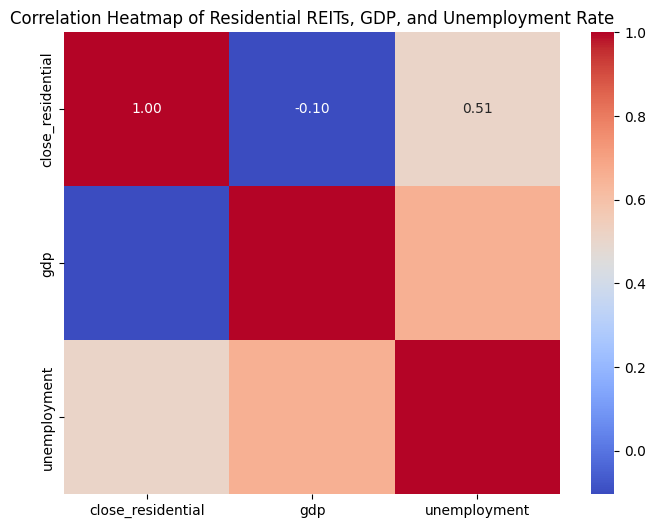

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["close_residential", "gdp", "unemployment"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Residential REITs, GDP, and Unemployment Rate")
plt.show()


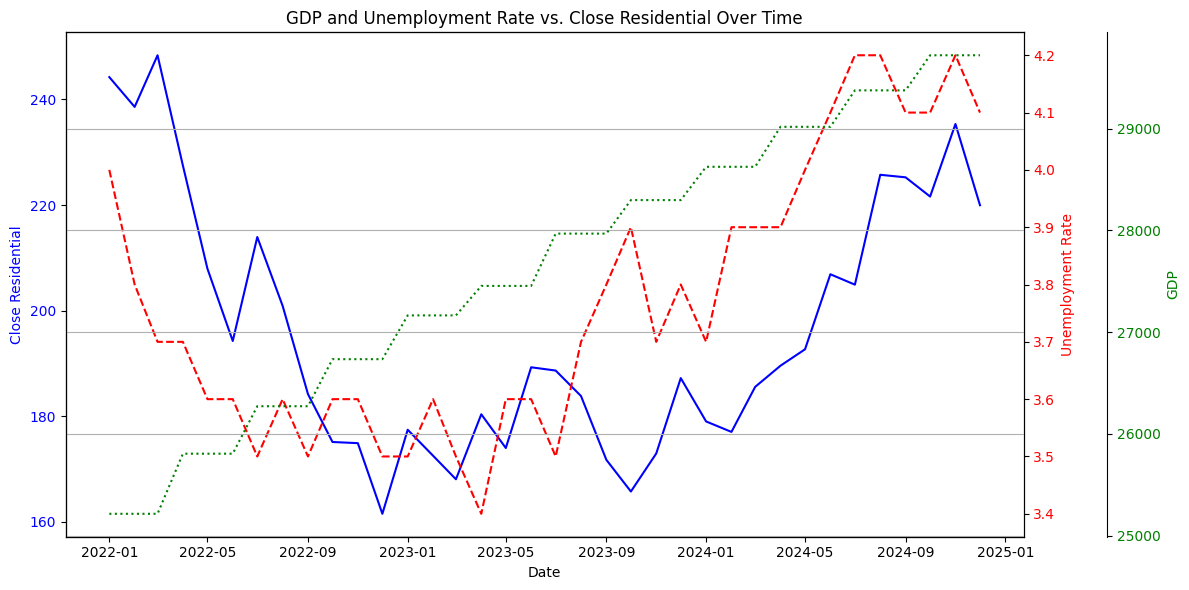

In [8]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Close Tower (left y-axis)
ax1.plot(df["Date"], df["close_residential"], label="Close Residential", color="blue")
ax1.set_xlabel("Date")
ax1.set_ylabel("Close Residential", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a secondary y-axis for Unemployment Rate
ax2 = ax1.twinx()
ax2.plot(df["Date"], df["unemployment"], label="Unemployment Rate", color="red", linestyle="dashed")
ax2.set_ylabel("Unemployment Rate", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Create a third y-axis for GDP
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))  # Offset to avoid overlap
ax3.plot(df["Date"], df["gdp"], label="GDP", color="green", linestyle="dotted")
ax3.set_ylabel("GDP", color="green")
ax3.tick_params(axis="y", labelcolor="green")

plt.title("GDP and Unemployment Rate vs. Close Residential Over Time")
fig.tight_layout()
plt.grid(True)
plt.show()